In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

In [ ]:
reviewsList = []
starsList = []

In [ ]:
for i in range(1,200):

    url = "https://www.flipkart.com/apple-iphone-12-black-64-gb/product-reviews/itma2559422bf7c7?pid=MOBFWBYZU5FWK2VP&lid=LSTMOBFWBYZU5FWK2VPUYA8BN&marketplace=FLIPKART&page=" + str(i)
    headers = {"User-Agent": 'Safari/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/11.1.2 Safari/605.1.15'}

    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')

    file = open('reviews.csv', 'a', encoding='utf-8')
    wrt = csv.writer(file)

    for review in soup.find_all("div", {"class": "t-ZTKy"}):
        reviewsList.append(review.text)

    for star in soup.find_all("div", {"class": "_3LWZlK _1BLPMq"}):
        starsList.append(star.text)

    for i in range(1, len(rlist)-1):
        wrt.writerow([reviewsList[i], starsList[i]])

# Reading the Dataset 

In [ ]:
import numpy as np
import pandas as pd
import string

In [ ]:
data = pd.read_csv("dataset.csv")
data.head(10)

,review,rating
0,"Delightful phone, the phone is just a peice of...",5.0
1,NaN,NaN
2,It’s my first iPhone ever and I bought it with...,5.0
3,NaN,NaN
4,We get better phone with better features from ...,5.0
5,NaN,NaN
6,My 1st iPhone ever and I’m loving it. Great pe...,5.0
7,NaN,NaN
8,iPhone 6S Plus 64GB -> iPhone 12 128GBMy 2nd i...,5.0
9,NaN,NaN


In [ ]:
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
data.head(10)

,review,rating
0,"Delightful phone, the phone is just a peice of...",5.0
2,It’s my first iPhone ever and I bought it with...,5.0
4,We get better phone with better features from ...,5.0
6,My 1st iPhone ever and I’m loving it. Great pe...,5.0
8,iPhone 6S Plus 64GB -> iPhone 12 128GBMy 2nd i...,5.0
10,"The best is yet to come, I am really happy wit...",5.0
12,Beautiful.. every time there is improvement in...,5.0
14,Night mode is simply amazing and give you a cl...,5.0
16,"Delightful phone, the phone is just a peice of...",5.0
18,It’s my first iPhone ever and I bought it with...,5.0


# Assigning Labels to the dataset


In [ ]:
p_n = []

for row in data['rating']:
  if row>=3:
    p_n.append(1)
  else:
    p_n.append(0)

print(len(p_n))
data['Label'] = p_n
len(data[data['Label']==1])

3418


1495

In [ ]:
data.head(10)

,review,rating,Label
0,"Delightful phone, the phone is just a peice of...",5.0,1
2,It’s my first iPhone ever and I bought it with...,5.0,1
4,We get better phone with better features from ...,5.0,1
6,My 1st iPhone ever and I’m loving it. Great pe...,5.0,1
8,iPhone 6S Plus 64GB -> iPhone 12 128GBMy 2nd i...,5.0,1
10,"The best is yet to come, I am really happy wit...",5.0,1
12,Beautiful.. every time there is improvement in...,5.0,1
14,Night mode is simply amazing and give you a cl...,5.0,1
16,"Delightful phone, the phone is just a peice of...",5.0,1
18,It’s my first iPhone ever and I bought it with...,5.0,1


In [ ]:
data.tail(10)

,review,rating,Label
6816,Waste of MoneyREAD MORE,1.0,0
6818,Worst phone. Need improvement. I gave it to a ...,1.0,0
6820,AwesomeREAD MORE,1.0,0
6822,Silent mode is automatically turning on and of...,1.0,0
6824,Just apple thing nothing specialREAD MORE,1.0,0
6826,Mobile is not turning on.READ MORE,1.0,0
6828,Please make sure you are buying it with exchan...,1.0,0
6830,Mobile hangsREAD MORE,1.0,0
6832,Nice original superb powerfulREAD MORE,1.0,0
6834,Buying a phone worth 80k and again charging fo...,1.0,0


# Shuffling the rows in the dataset

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
data.head(10)

,review,rating,Label
0,price range is not for everyone but if you can...,5.0,1
1,Very very very very very poorREAD MORE,1.0,0
2,"Buy only for the namesake. Heats a lot, batter...",1.0,0
3,Excellent product and excellent prompt service...,4.0,1
4,The phone is not charging. And i don't know ho...,1.0,0
5,I think it’s price high according to its featu...,5.0,1
6,Excellent phone... And flipkart delivered it p...,4.0,1
7,Not as perfect that I heard it’s qualityREAD MORE,1.0,0
8,Wonderful experience with this new gorgeous iP...,5.0,1
9,One of the worst product..Heating issues in 1 ...,1.0,0


# Converting the reviews to lowercase and removing punctuations

In [ ]:
data['review'] = data['review'].apply(lambda x: x.lower()) #lower case

In [ ]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['review'] = data['review'].apply(punctuation_removal)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Visualization

## Histogram to check frequency of ratings

rating
1.0    1923
3.0      48
4.0     228
5.0    1219
Name: review, dtype: int64


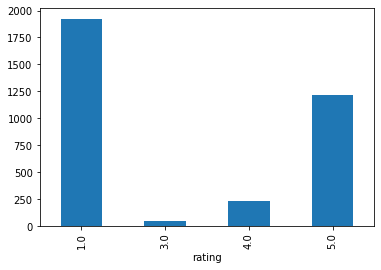

In [ ]:
print(data.groupby(['rating'])['review'].count())
data.groupby(['rating'])['review'].count().plot(kind="bar")
plt.show()

## Number of positive and negative reviews

Label
0    1923
1    1495
Name: review, dtype: int64


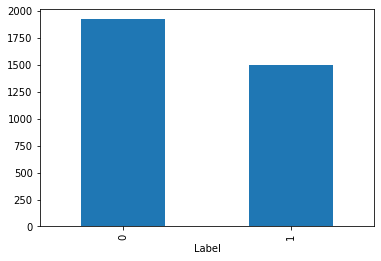

In [ ]:
print(data.groupby(['Label'])['review'].count())
data.groupby(['Label'])['review'].count().plot(kind="bar")
plt.show()

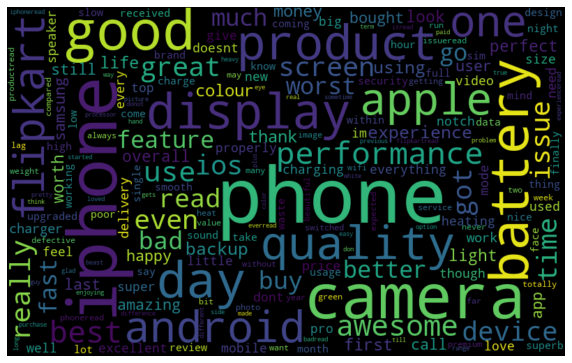

In [ ]:
from wordcloud import WordCloud
fake_data = data[data["Label"] == "1"]
all_words = ' '.join([review for review in data.review])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

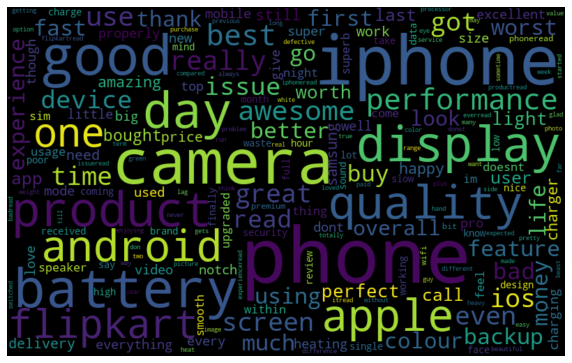

In [ ]:
from wordcloud import WordCloud
fake_data = data[data["Label"] == "0"]
all_words = ' '.join([review for review in data.review])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Defining function to print Confusion matrix

In [ ]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
    else:
            print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Splitting the dataset 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['review'], data.Label, test_size=0.2, random_state=42)

# Applying TFIDF Vectorisation and training classification models

## Logistic Regression

In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.71%


Confusion matrix, without normalization


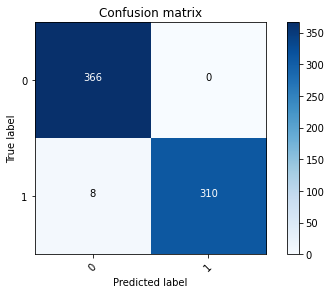

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['0', '1'])

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.71%


Confusion matrix, without normalization


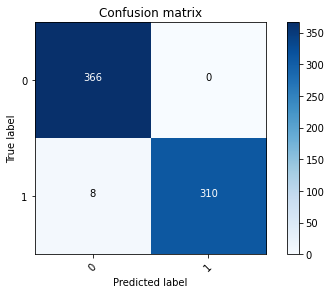

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['0', '1'])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.56%


Confusion matrix, without normalization


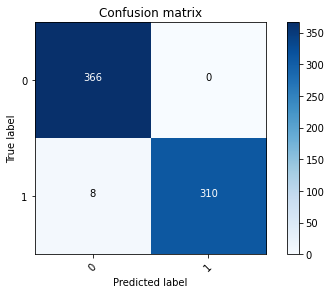

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['0', '1'])

## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.83%


Confusion matrix, without normalization


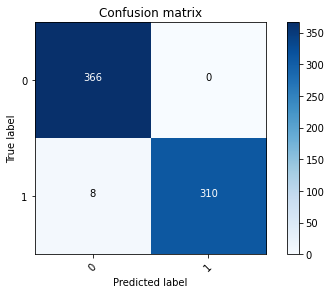

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['0', '1'])

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC  
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SVC(kernel='linear') )])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.71%


Confusion matrix, without normalization


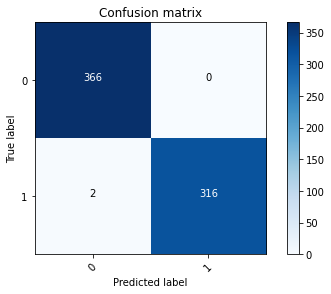

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['0', '1'])

## Classification of unseen reviews

In [ ]:
print(pipe.predict(["It's the worst phone"]))

[0]


In [ ]:
print(pipe.predict(["I liked the phone"]))

[1]


In [ ]:
print(pipe.predict(["The phone is good but the battery life is bad"]))

[1]
